In [1]:
from collections import Counter
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import cv2

# convert images and labels into defined data structures
def process_data(image_dir, labels_dir, ignore=[]):
    """
    params
    ---
    image_dir : str
      path to directory with images
    labels_dir : str
      path to tsv file with labels
    returns
    ---
    img2label : dict
      keys are names of images and values are correspondent labels
    chars : list
      all unique chars used in data
    all_labels : list
    """

    chars = []
    img2label = dict()

    raw = open(labels_dir, 'r', encoding='utf-8').read()
    temp = raw.split('\n')
    for t in temp:
        try:
            x = t.split('\t')
            flag = False
            for item in ignore:
                if item in x[1]:
                    flag = True
            if flag == False:
                img2label[image_dir + x[0]] = x[1]
                for char in x[1]:
                    if char not in chars:
                        chars.append(char)
        except:
            print('ValueError:', x)
            pass

    all_labels = list(img2label.values())
    chars.sort()

    return img2label, chars, all_labels


# GENERATE IMAGES FROM A FOLDER
def generate_images(img_paths):
    """
    params
    ---
    names : list of str
        paths to images
    returns
    ---
    data_images : list of np.array
        images in np.array format
    """
    data_images = []
    for path in tqdm(img_paths):
        img = cv2.imread(path)
        try:
            data_images.append(img.astype('uint8'))
        except:
            img = process_image(img)
    return data_images


In [2]:
TRAIN_IMAGE_DIR = '../input/cyrillic-handwriting-dataset/train/'
TRAIN_LABELS_DIR = '../input/cyrillic-handwriting-dataset/train.tsv'

TEST_IMAGE_DIR = '../input/cyrillic-handwriting-dataset/test/'
TEST_LABELS_DIR = '../input/cyrillic-handwriting-dataset/test.tsv'

img2label_train, chars_train, all_words_train = process_data(TRAIN_IMAGE_DIR, TRAIN_LABELS_DIR)  # TRAIN PART
img2label_test, chars_test, all_words_test = process_data(TEST_IMAGE_DIR, TEST_LABELS_DIR)  # TEST PART

img2label = {**img2label_train, **img2label_test} # MERGE
chars = chars_train + chars_test

image_names, labels = list(img2label.keys()), [img2label[key] for key in img2label.keys()]

images = generate_images(image_names)

100%|██████████| 73830/73830 [09:05<00:00, 135.37it/s]


Size of dataset: 73830
Max length of expression: 40
The most common char: ('о', 56735)
The least common char: ('x', 1)
The most common expression: ('что', 351)
The least common expression: ('продолжила борьбу', 1)


<BarContainer object of 107 artists>

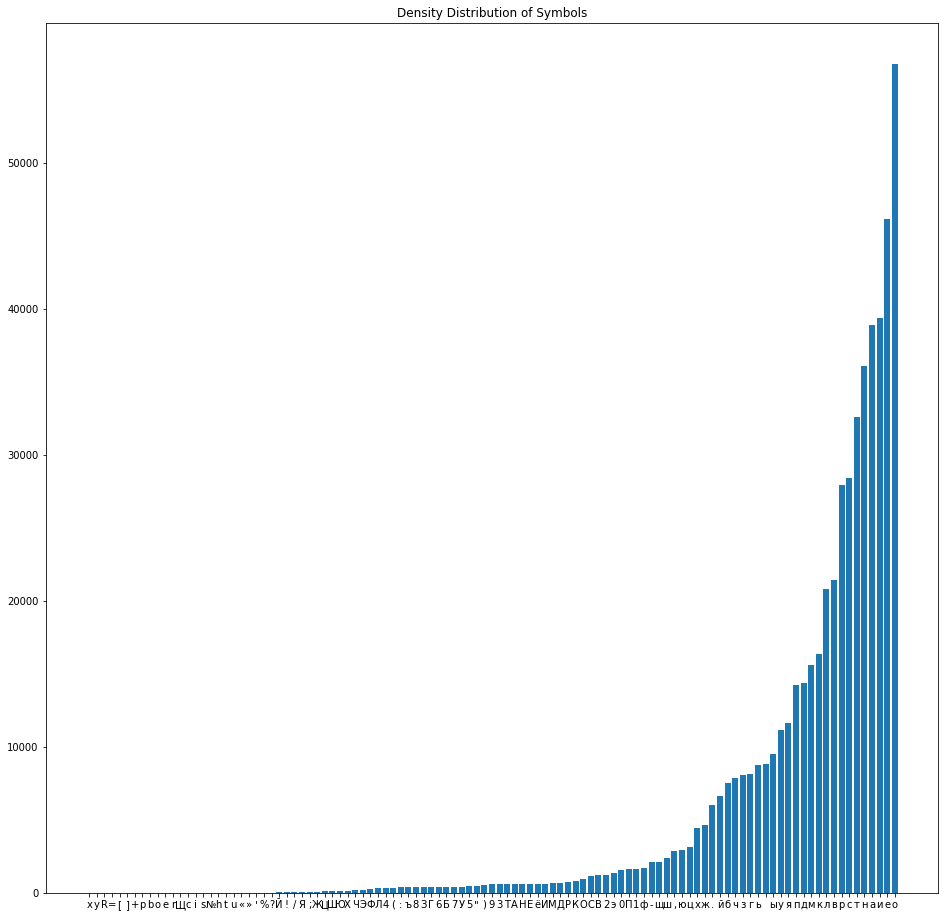

In [3]:
N = len(labels)
max_len = -1
for label in labels:
    if len(label) > max_len:
        max_len = len(label)

counter_length = {}
for lable in labels:
    L = len(lable)
    if L not in counter_length.keys():
        counter_length[L] = 0
    counter_length[L] += 1
    
counter_exps = Counter(labels)
counter_exps = dict(sorted(counter_exps.items(), key=lambda item: item[1]))
counter_chars = Counter(''.join(labels))
counter_chars = dict(sorted(counter_chars.items(), key=lambda item: item[1]))
print(
    'Size of dataset: {}\nMax length of expression: {}\nThe most common char: {}\nThe least common char: {}\nThe most common expression: {}\nThe least common expression: {}'.format( \
        N, max_len, list(counter_chars.items())[-1], list(counter_chars.items())[0], list(counter_exps.items())[-1], list(counter_exps.items())[0]))


plt.figure(figsize=(16, 16))
plt.title('Density Distribution of Symbols')
plt.bar(counter_chars.keys(), [counter_chars[key] for key in counter_chars.keys()])

<BarContainer object of 39 artists>

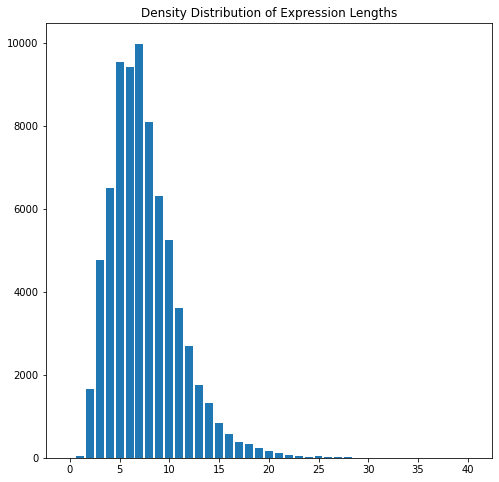

In [4]:
plt.figure(figsize=(8, 8))
plt.title('Density Distribution of Expression Lengths')
plt.bar(counter_length.keys(), [counter_length[key] for key in counter_length.keys()])

взаимное
голова
автобуса
конкуренции
считаю
населения
но это
ф-ла
опр
выполнения
тогда
депутат


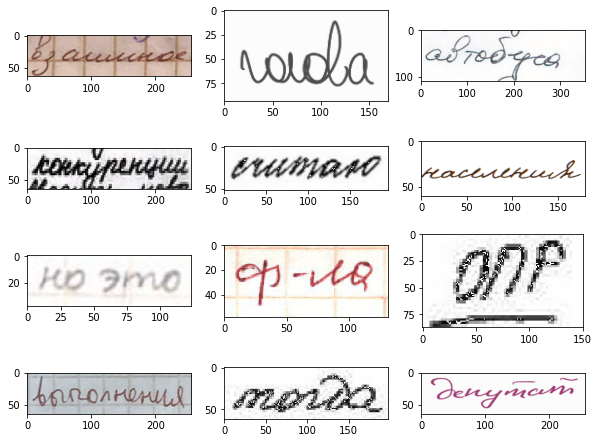

In [5]:
N_examples = 12
examples = []

for k in range(N_examples):
    i = random.randint(0, len(images))
    img = images[i]
    trans = labels[i]
    examples.append([img,trans])
fig = plt.figure(figsize=(10, 10))
rows = int(N_examples / 4) + 2
columns = int(N_examples / 8) + 2
for j, exp in enumerate(examples):
    fig.add_subplot(rows, columns, j + 1)
    plt.imshow(exp[0])
    print(exp[1])